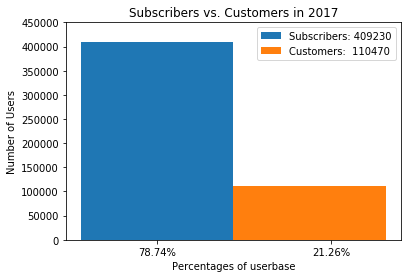

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline
df = pd.read_csv('2017-fordgobike-tripdata.csv')
non_sub_count=len(df[df['user_type']=='Customer'])
sub_count=len(df[df['user_type']=='Subscriber'])

N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, sub_count, width)
p2 = plt.bar(ind+width, non_sub_count, width)

plt.ylabel('Number of Users')
plt.xlabel('Percentages of userbase')
plt.title('Subscribers vs. Customers in 2017')
plt.xticks(np.arange(0, .80, step=0.40), ('{0:.2f}%'.format(100*sub_count/(non_sub_count+sub_count)),'{0:.2f}%'.format(100*non_sub_count/(non_sub_count+sub_count))))
plt.yticks(np.arange(0, 500000,step=50000))
plt.legend((p1[0], p2[0]), ('Subscribers: {}'.format(sub_count), 'Customers:  {}'.format(non_sub_count)))

plt.show()

## Pricing of Go Ford Bike
### Customers
Single ride (up to 30 minutes) - 3.00

Day Access (unlimited 30 minute rides) - 10.00

3 Day Access (unlimited 30 minute rides) - 20.00

### Subscribers
Monthly Subscriber(unlimited 45 minutes) - 15.00

### Late Fees
Bikes kept out longer than allowed trip time - 3.00 per 15 minutes

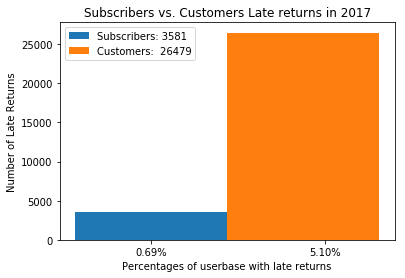

In [107]:
# want to obtain the amount of income from subscribers versus customers
# to change for seconds to minutes need to use module 60 and divide by 60
# need to obtain a list of customer that went over their allowed time, use divide 15 to see increments
late_group = df[df['duration_sec'] > 1800]
sub_late_group = late_group[late_group['duration_sec'] > 2700]
non_sub_late=late_group[late_group['user_type']=='Customer']
#Note that subscribers have a time limit of 45 minutes
sub_late=sub_late_group[sub_late_group['user_type']=='Subscriber']

N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, len(sub_late), width)
p2 = plt.bar(ind+width, len(non_sub_late), width)

plt.ylabel('Number of Late Returns')
plt.xlabel('Percentages of userbase with late returns')
plt.title('Subscribers vs. Customers Late returns in 2017')
plt.xticks(np.arange(0, .80, step=0.40), ('{0:.2f}%'.format(100*len(sub_late)/((non_sub_count+sub_count))),'{0:.2f}%'.format(100*len(non_sub_late)/(non_sub_count+sub_count))))
plt.yticks(np.arange(0, 30000,step=5000))
plt.legend((p1[0], p2[0]), ('Subscribers: {}'.format(len(sub_late)), 'Customers:  {}'.format(len(non_sub_late))))

plt.show()

In [108]:
# make a list containing the number of seconds that subs went over

In [109]:
list_seconds_sub = np.arange(len(sub_late))
list_seconds_non = np.arange(len(non_sub_late))
time_sub_late = sub_late['duration_sec']
time_non_late = non_sub_late['duration_sec']
list_seconds_sub = time_sub_late
list_seconds_non = time_non_late
list_seconds_sub -= 2700
list_seconds_non -= 1800
list_seconds_sub = np.rint(list_seconds_sub/60)
list_seconds_non = np.rint(list_seconds_non/60)
# Prints minutes overdue

In [110]:
df_route=df[['start_station_name','end_station_name','duration_sec']].groupby(['start_station_name','end_station_name']).count().sort_values('duration_sec', ascending=False)
route_20=df_route.reset_index().head(20)
route_20

,start_station_name,end_station_name,duration_sec
0,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St,3344
1,The Embarcadero at Sansome St,Steuart St at Market St,1793
2,The Embarcadero at Sansome St,San Francisco Ferry Building (Harry Bridges Pl...,1734
3,Berry St at 4th St,San Francisco Ferry Building (Harry Bridges Pl...,1686
4,2nd St at S Park St,Montgomery St BART Station (Market St at 2nd St),1509
5,Montgomery St BART Station (Market St at 2nd St),2nd St at S Park St,1485
6,San Francisco Ferry Building (Harry Bridges Pl...,Berry St at 4th St,1401
7,Steuart St at Market St,The Embarcadero at Sansome St,1361
8,2nd St at Townsend St - Coming Soon,San Francisco Ferry Building (Harry Bridges Pl...,1274
9,19th Street BART Station,Grand Ave at Perkins St,1196


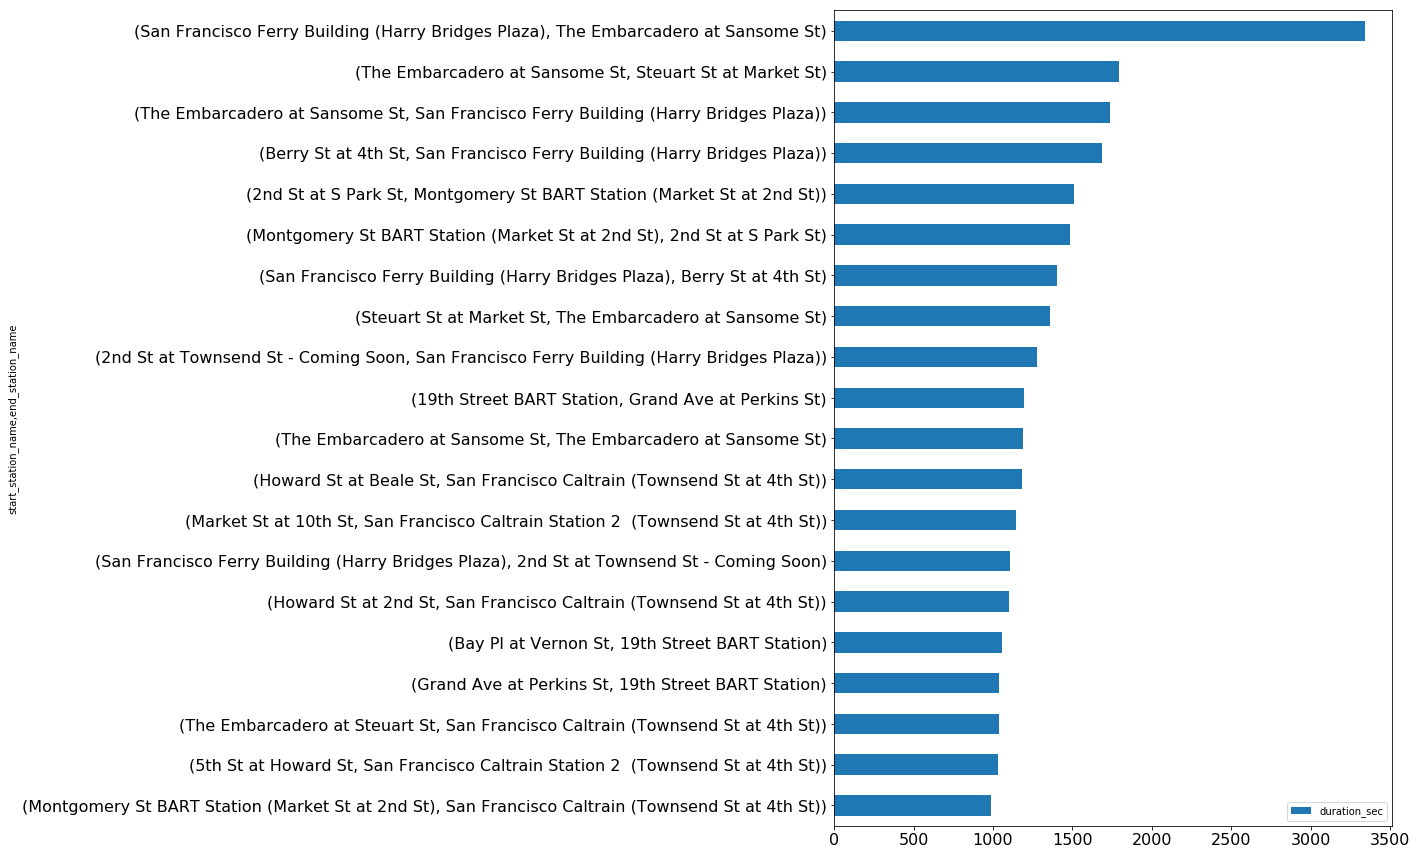

In [111]:
df_route.head(20).sort_values('duration_sec',ascending=True).plot(kind='barh',figsize=(10,15),fontsize=16,sort_columns=True)

<BarContainer object of 20 artists>

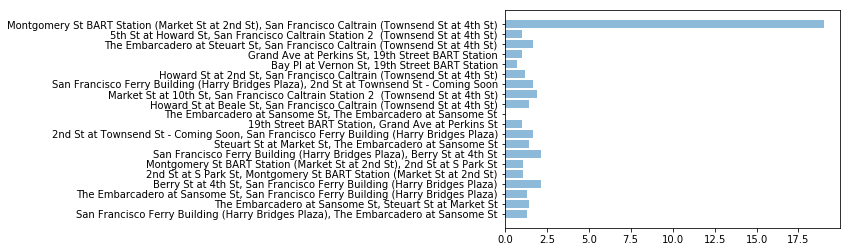

In [112]:
import math
df_route_distance = df[['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','duration_sec']].groupby(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).count().sort_values('duration_sec', ascending=False)

distance_df = np.arange(20,dtype=np.float)
#Make list, find distance, save that distance to new list
# approximate radius of earth in km
R = 6373.0
for m in range(0,19):
    start_lat = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'start_station_latitude'])
    start_long = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'start_station_longitude'])
    end_lat = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'end_station_latitude'])
    end_long = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'end_station_longitude'])
    
    dlon = end_long - start_long
    dlat = end_lat - start_lat

    a = math.sin(dlat / 2)**2 + math.cos(start_lat) * math.cos(end_lat) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance_df[m] = R * c
    
route_20['Distance']=distance_df
route_20['Trip']=route_20['start_station_name'].map(str)+", "+route_20['end_station_name']
plt.barh(route_20['Trip'], route_20['Distance'], align='center', alpha=0.5)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [114]:
from datetime import datetime

df['start_time']=df['start_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
df['end_time']=df['end_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

In [80]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
dtype: object

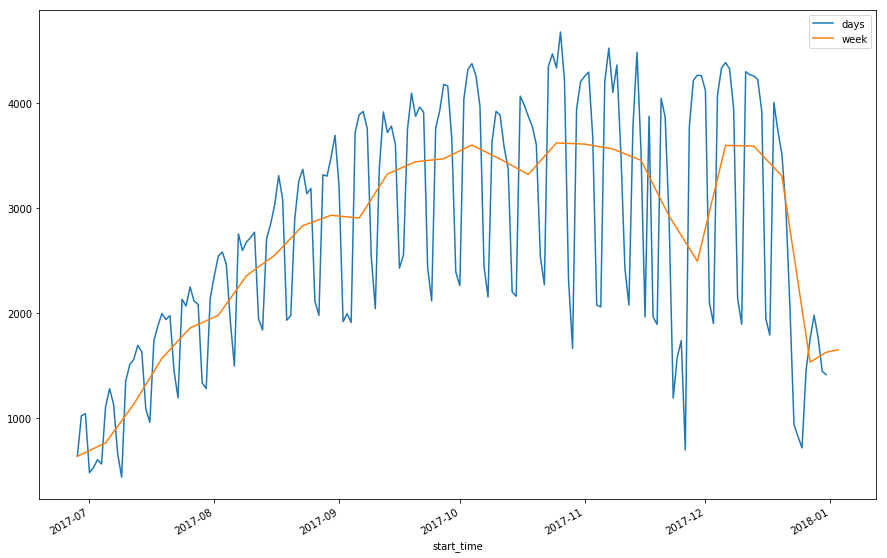

In [175]:
df_resample=df['duration_sec'].resample('D').count()
df_resample_hour=df['duration_sec'].resample()
df_resample_week = df_resample.resample('W-WED').mean()
df_resample_day_and_week=pd.concat([df_resample,df_resample_week], axis=1)
df_resample_day_and_week.columns=['days','week']
df_resample_day_and_week
df_resample_day_and_week['week']=df_resample_day_and_week['week'].interpolate()
df_resample_day_and_week.plot(figsize=(15,10))
#do it hourly with mean
#do it weekly, join with daily for trend
#groupby and then pivot(for stations)

Text(0.5,1,'Box Graph of all Rides by bike')

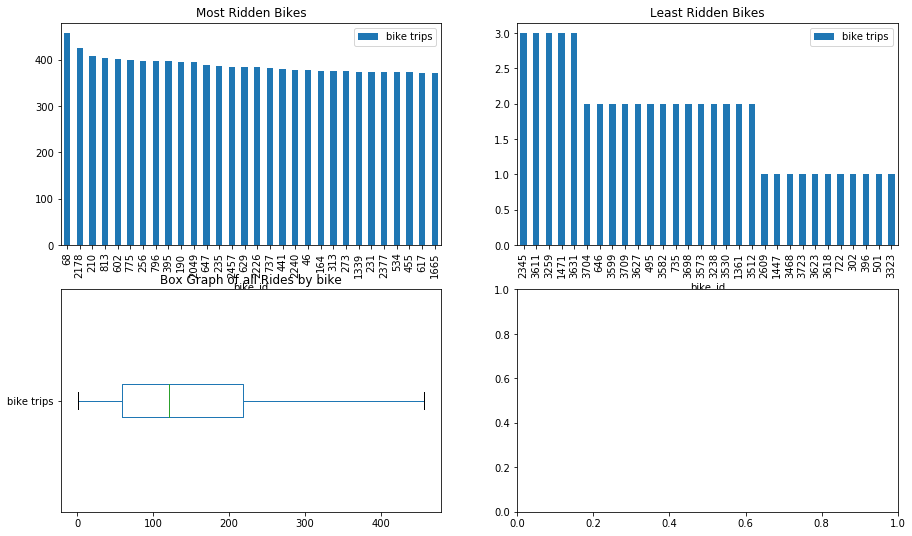

In [287]:
bike_id_count=df[['bike_id','duration_sec']].groupby(['bike_id']).count().sort_values('duration_sec', ascending=False)
# use sum with duration seconds to see which bike was the most ridden
bike_id_index = bike_id_count.index.values
bike_id_count.columns=['bike trips']
fig, axes = plt.subplots(nrows=2, ncols=2)
bike_id_count.head(30).plot(ax=axes[0,0],kind='bar', figsize=(15,9))
axes[0,0].set_title('Most Ridden Bikes')
bike_id_count.tail(30).plot(ax=axes[0,1],kind='bar', figsize=(15,9))
axes[0,1].set_title('Least Ridden Bikes')
bike_id_count.plot.box(ax=axes[1,0], figsize=(15,9),vert=False)
axes[1,0].set_title('Box Graph of all Rides by bike')

Text(0.5,1,'Box Graph of seconds rode by bike')

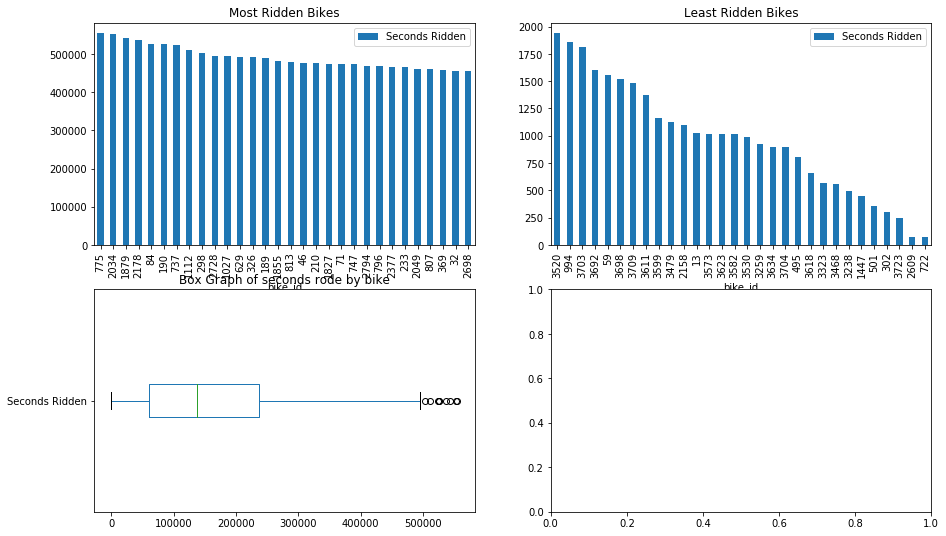

In [291]:
bike_id_sum=df[['bike_id','duration_sec']].groupby(['bike_id']).sum().sort_values('duration_sec', ascending=False)

bike_id_sum.columns=['Seconds Ridden']
fig, axes = plt.subplots(nrows=2, ncols=2)
bike_id_sum.head(30).plot(ax=axes[0,0],kind='bar', figsize=(15,9))
axes[0,0].set_title('Most Ridden Bikes')
bike_id_sum.tail(30).plot(ax=axes[0,1],kind='bar', figsize=(15,9))
axes[0,1].set_title('Least Ridden Bikes')
bike_id_sum.plot.box(ax=axes[1,0], figsize=(15,9),vert=False)
axes[1,0].set_title('Box Graph of seconds rode by bike')
#bike_id_time_df = pd.DataFrame()
#bike_id_time_df
#for m in range(0,19):
    #temp_df=df[df['bike_id']==bike_id_index[m]]
    #temp_index = temp_df.index.values
    #temp_index_df = pd.DataFrame({'{}'.format(bike_id_index[m]):temp_index})
    #bike_id_time_df=pd.concat([bike_id_time_df,temp_index_df], axis=1)
#bike_id_time_df_T = bike_id_time_df.T
#bike_id_time_df
#make a for loop that goes through top 20 and inserts it to a new df with index being time and each column being the the bike id corresponding to that start time

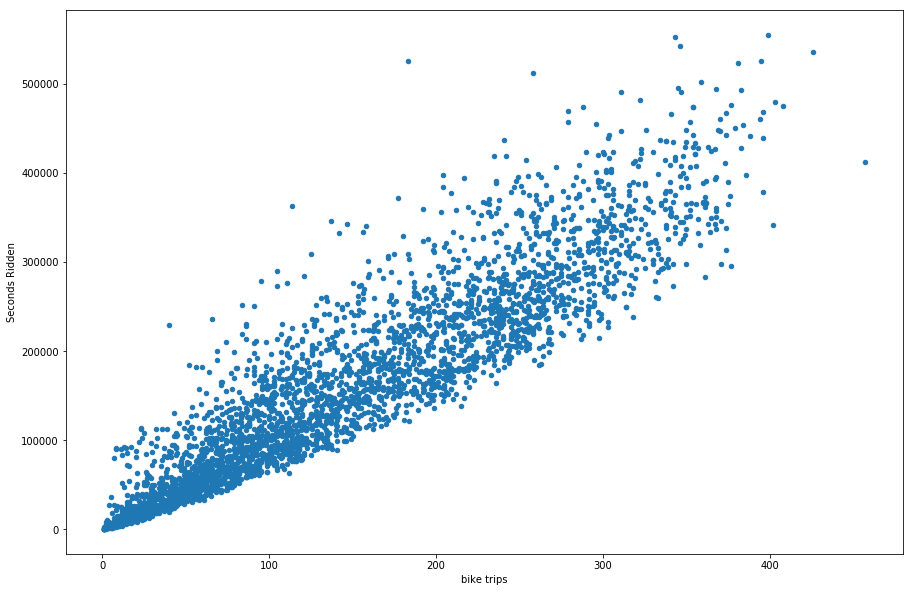

In [294]:
bike_id_count_sum = pd.concat([bike_id_count,bike_id_sum], axis=1)
bike_id_count_sum.plot.scatter(x='bike trips', y='Seconds Ridden', figsize=(15,10))